In [3]:
from genre_classification.paths import path_annotation_original
import librosa
import librosa.display
import pandas as pd
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
df_annotation = pd.read_csv(path_annotation_original, index_col=0)
random_state = 42

# Choose genres you want to sample
samples_genre = ['rock', 'country', 'classical']

# RMS params
RMS_FRAME_LENGTH = 1024
RMS_HOP_LENGTH = 512

# Mel spectrogram params
MEL_N_FFT = 2048
MEL_HOP_LENGTH = 512
MEL_N_MELS = 90

In [5]:
df_annotation['genre'].value_counts()

pop          100
metal        100
disco        100
blues        100
reggae       100
classical    100
rock         100
hiphop       100
country      100
jazz          99
Name: genre, dtype: int64

In [6]:
sample_rate = 22050
samples_wav_path = []
samples_wav_y = []
samples_wav_rms = []
samples_image_path = []
samples_melspec_log = []
for sample_genre in samples_genre:
    sample_idx = df_annotation[df_annotation['genre']==sample_genre].sample(1, random_state=random_state).index.item()
    sample_wav_path = df_annotation.loc[sample_idx, 'wav_path']
    sample_wav_y = librosa.load(sample_wav_path, sr=sample_rate)[0]
    sample_wav_rms = librosa.feature.rms(y=sample_wav_y, frame_length=RMS_FRAME_LENGTH, hop_length=RMS_HOP_LENGTH)[0]
    sample_image_path = df_annotation.loc[sample_idx, 'image_path']
    sample_melspec = librosa.feature.melspectrogram(y=sample_wav_y, sr=sample_rate, n_fft=MEL_N_FFT, hop_length=MEL_HOP_LENGTH, n_mels=MEL_N_MELS)
    sample_melspec_log = librosa.power_to_db(sample_melspec)
    
    # time axis for rms plot: it should be equal for all the signals
    frames = range(len(sample_wav_rms))
    t = librosa.frames_to_time(frames, hop_length=RMS_HOP_LENGTH) 
    
    # Update the lists
    samples_wav_path.append(sample_wav_path)
    samples_wav_y.append(sample_wav_y)
    samples_wav_rms.append(sample_wav_rms)
    samples_image_path.append(sample_image_path)
    samples_melspec_log.append(sample_melspec_log)
    

In [14]:
samples_melspec_log[0].min()

-53.39785

In [5]:
# airst sample track
ipd.Audio(samples_wav_y[0], rate=sample_rate)

In [6]:
# Second sample track
ipd.Audio(samples_wav_y[1], rate=sample_rate)

In [7]:
# Third sample track
ipd.Audio(samples_wav_y[2], rate=sample_rate)

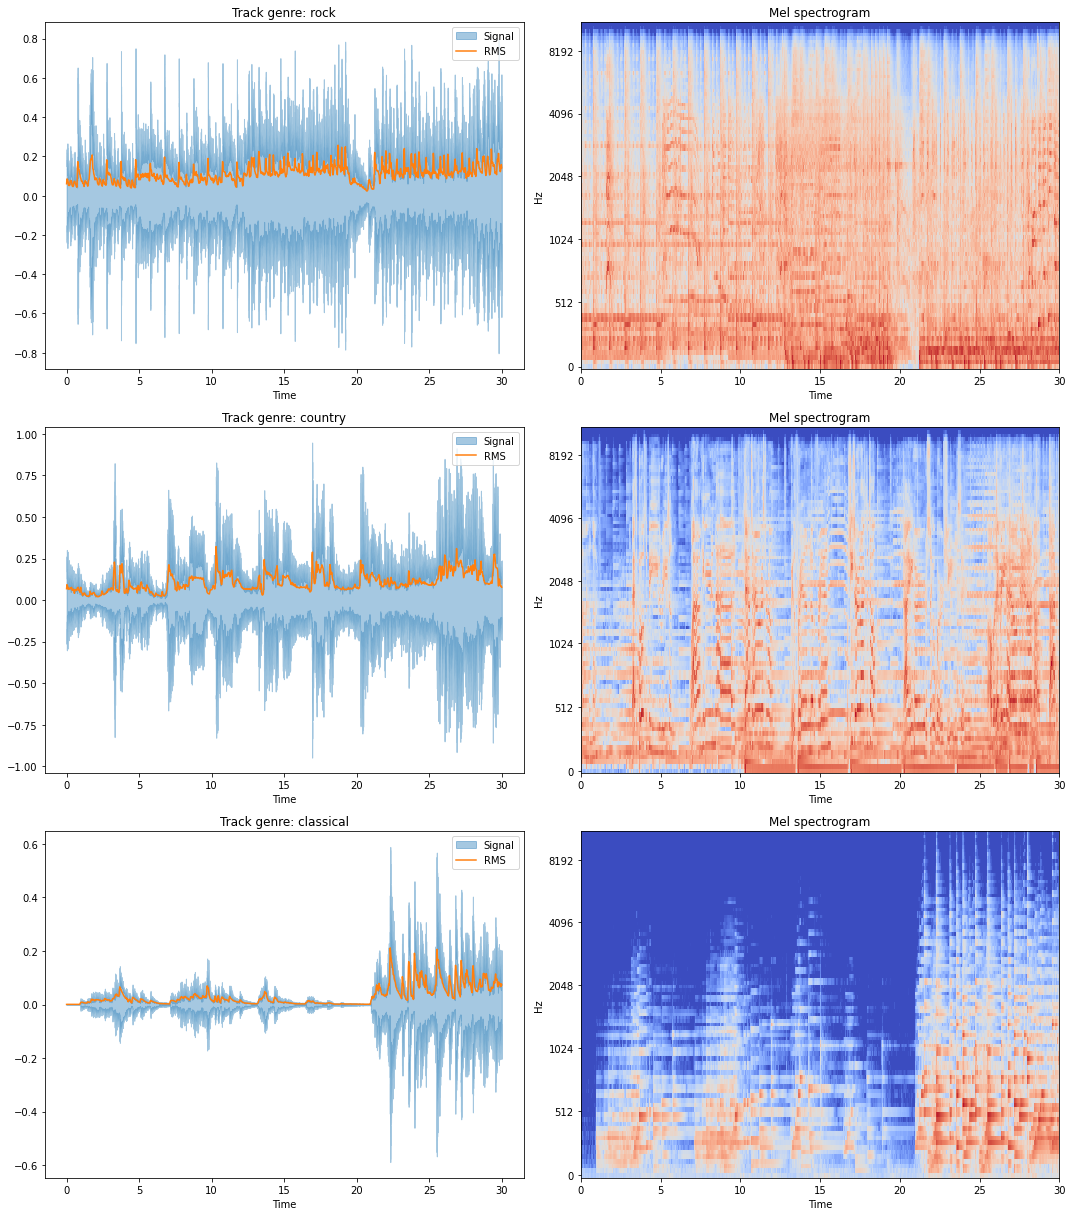

In [8]:
fig, axs = plt.subplots(len(samples_genre), 2, figsize=(15, 17))
for idx, ax in enumerate(axs):
    librosa.display.waveshow(samples_wav_y[idx], ax=ax[0], alpha=.4, label='Signal', sr=sample_rate)
    ax[0].plot(t, samples_wav_rms[idx], label='RMS')
    ax[0].set_title(f'Track genre: {samples_genre[idx]}')
    ax[0].legend()
    librosa.display.specshow(samples_melspec_log[idx], x_axis='time', y_axis='mel', sr=sample_rate, ax=ax[1])
    ax[1].set_title('Mel spectrogram')
plt.tight_layout()

/Users/luigi/opt/anaconda3/envs/music-genre-classification/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Error loading: /Users/luigi/Documents/GitHub/Music-Genre-Classification/data/raw/genres_original/jazz/jazz.00054.wav


<AxesSubplot:ylabel='Count'>

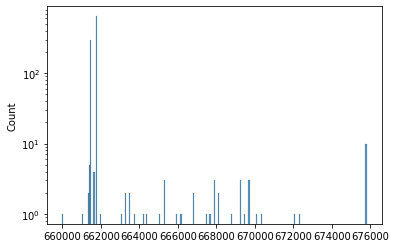

In [9]:
samples_len = []
samples_sr = []
for idx, df_row in df_annotation.iterrows():
    sample_wav_path = df_row['wav_path']
    try:
        y, sr = librosa.load(sample_wav_path, sr=sample_rate)
        samples_len.append(len(y))
        samples_sr.append(sr)
    except:
        print(f'Error loading: {sample_wav_path}')
        
sns.histplot(x=np.array(samples_len), log_scale=(False, True))

# 661794 is the most frequent sample length